# PS5 - Arath Reyes

## Problem 1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

### (a)

In [5]:
f = lambda x,y: 3*(x**2 + y)/11

In [6]:
X, Y  = np.linspace(0, 2, 200), np.linspace(0, 2, 100)
Z = np.array(f(x,y) for x,y in product(X,Y))

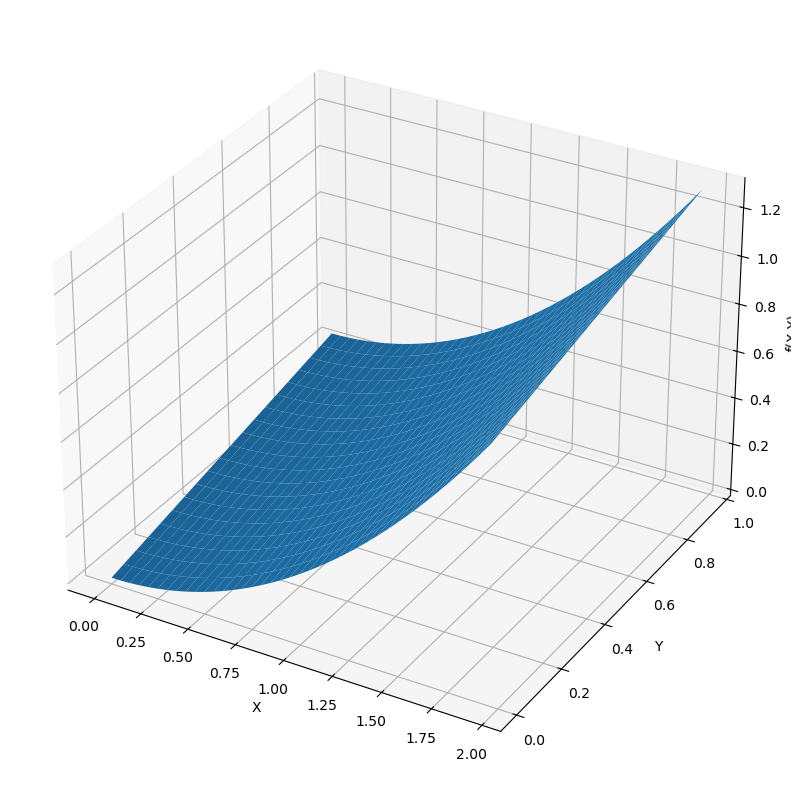

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 2.0, 0.05)
y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')

plt.show()

### (b)

In [9]:
f_x = lambda x: (3/22)*(x**2 + 1)

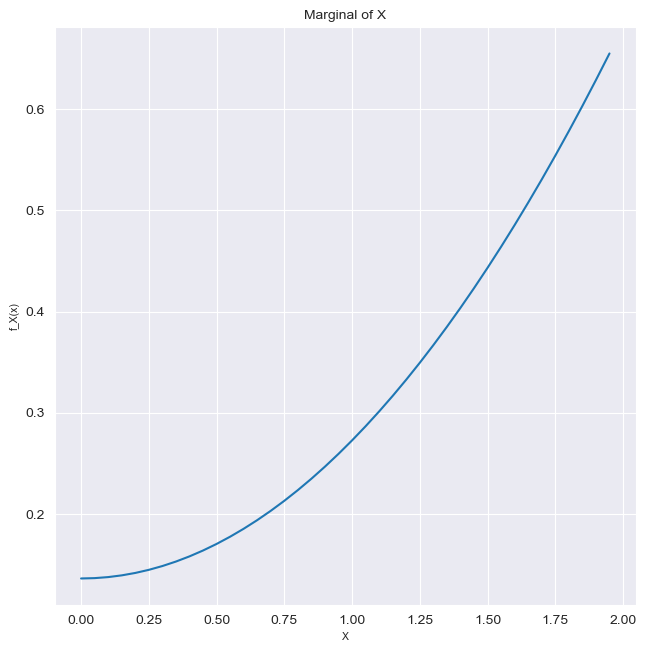

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (7.5,7.5))
ax = sns.lineplot(x = X[0], y = f_x(X)[0])
ax.set_title(f'Marginal of X',fontsize = 10)
ax.set_xlabel('X',fontsize = 7.5)
ax.set_ylabel('f_X(x)',fontsize = 7.5)
plt.show()

### (c)

In [12]:
f_y = lambda y: (8 + 6*y)/11

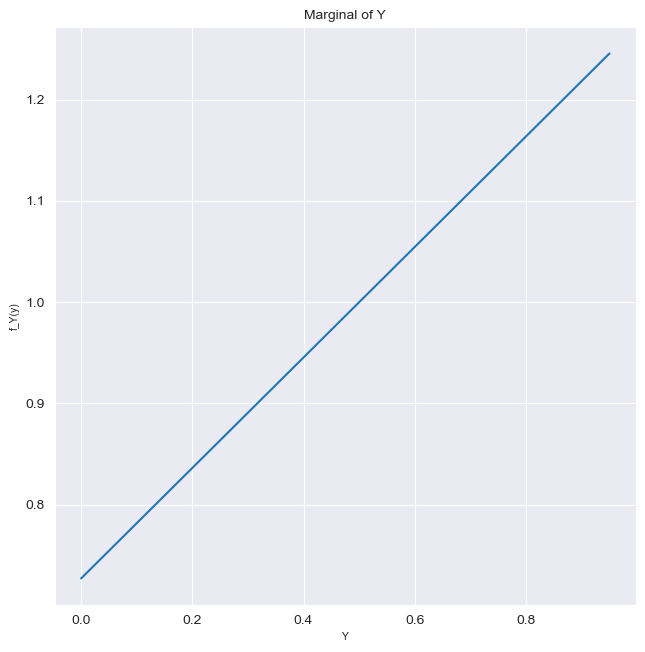

In [13]:
plt.figure(figsize = (7.5,7.5))
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = f_y(np.arange(0, 1, 0.05)))
ax.set_title(f'Marginal of Y',fontsize = 10)
ax.set_xlabel('Y',fontsize = 7.5)
ax.set_ylabel('f_Y(y)',fontsize = 7.5)
plt.show()

### (d)

In [15]:
f_y_x = lambda y,x: 2*(x**2 + y)/(2*x**2 + 1)

In [16]:
sample_y_x = pd.DataFrame(index = np.linspace(0,1,100))

In [17]:
for x in [0,1,2]:
    sample_y_x[f'X = {x}'] = [f_y_x(y,x) for y in sample_y_x.index]

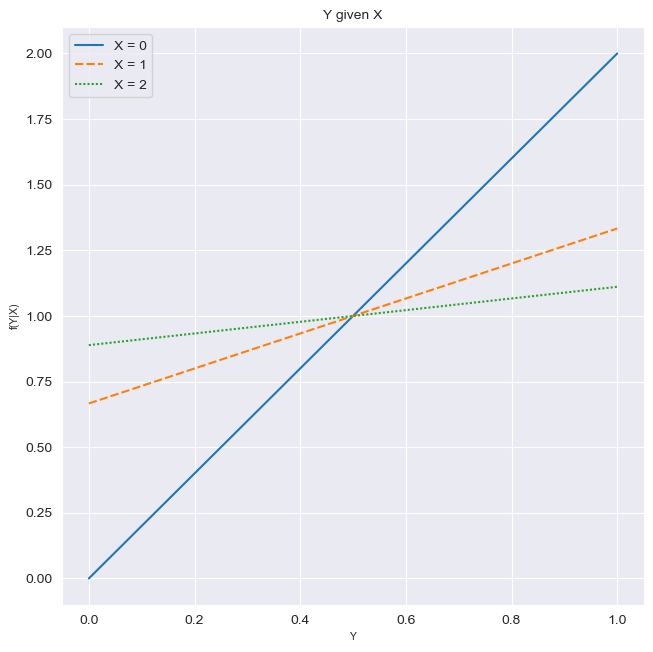

In [18]:
plt.figure(figsize = (7.5,7.5))
ax = sns.lineplot(sample_y_x)
ax.set_title(f'Y given X',fontsize = 10)
ax.set_ylabel('f(Y|X)',fontsize = 7.5)
ax.set_xlabel('Y',fontsize = 7.5)
plt.show()

### (h)

In [20]:
cef = lambda x: (3*x**2 + 2)/(3*(2*(x**2) + 1))
blp = lambda x: (1056/1661) - (10/151)*x

In [21]:
estimators = pd.DataFrame(index = np.arange(0, 2, 0.05))
estimators['CEF'] = cef(estimators.index)
estimators['BLP'] = blp(estimators.index)

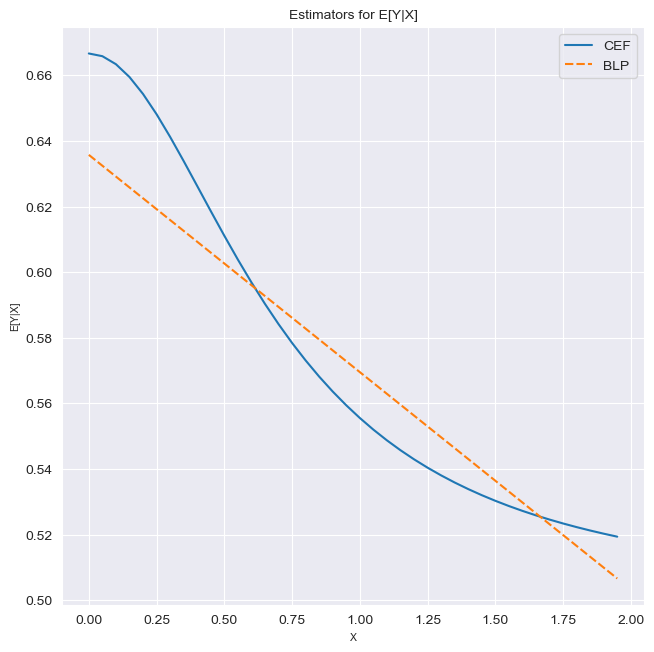

In [22]:
plt.figure(figsize = (7.5,7.5))
ax = sns.lineplot(data = estimators)
ax.set_title(f'Estimators for E[Y|X]',fontsize = 10)
ax.set_xlabel('X',fontsize = 7.5)
ax.set_ylabel('E[Y|X]',fontsize = 7.5)
plt.show()

## Problem 4

### (a)

In [25]:
# Define X'
X_T = np.array([[1, 1, 1, 1], [4, -2, 3, -5]])
X = X_T.T
XtX = np.dot(X_T, X)
XtX_inv = np.linalg.inv(XtX)

In [26]:
P = np.dot(np.dot(X, XtX_inv), X_T)
P.round(3)

array([[ 0.546,  0.102,  0.472, -0.12 ],
       [ 0.102,  0.324,  0.139,  0.435],
       [ 0.472,  0.139,  0.417, -0.028],
       [-0.12 ,  0.435, -0.028,  0.713]])

In [27]:
I = np.eye(P.shape[0])
M = I - P
M.round(3)

array([[ 0.454, -0.102, -0.472,  0.12 ],
       [-0.102,  0.676, -0.139, -0.435],
       [-0.472, -0.139,  0.583,  0.028],
       [ 0.12 , -0.435,  0.028,  0.287]])

In [28]:
MP = np.dot(M, P)
MP.round(4)

array([[ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.],
       [-0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.]])

### (b)

In [30]:
# Define Q
Q = np.array([[1, 3], [2, 8]])
X_tilde = np.dot(X, Q)
X_tilde.round(3)

array([[  9,  35],
       [ -3, -13],
       [  7,  27],
       [ -9, -37]])

In [31]:
X_tilde_T = X_tilde.T
Xt_tilde_X_tilde = np.dot(X_tilde_T, X_tilde)
Xt_tilde_X_tilde_inv = np.linalg.inv(Xt_tilde_X_tilde)

In [32]:
P_tilde = np.dot(np.dot(X_tilde, Xt_tilde_X_tilde_inv), X_tilde_T)
P_tilde.round(3)

array([[ 0.546,  0.102,  0.472, -0.12 ],
       [ 0.102,  0.324,  0.139,  0.435],
       [ 0.472,  0.139,  0.417, -0.028],
       [-0.12 ,  0.435, -0.028,  0.713]])

In [33]:
M_tilde = I - P_tilde
M_tilde.round(3)

array([[ 0.454, -0.102, -0.472,  0.12 ],
       [-0.102,  0.676, -0.139, -0.435],
       [-0.472, -0.139,  0.583,  0.028],
       [ 0.12 , -0.435,  0.028,  0.287]])

In [34]:
MP_tilde = np.dot(M_tilde, P_tilde)
MP_tilde.round(4)

array([[ 0., -0., -0., -0.],
       [-0., -0., -0., -0.],
       [-0., -0., -0., -0.],
       [-0., -0., -0., -0.]])